In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting Started with Bokeh

+ Bokeh main website: https://bokeh.pydata.org/en/latest/

+ Bokeh docs: https://bokeh.pydata.org/en/latest/docs/reference.html

+ Userguide: https://bokeh.pydata.org/en/latest/docs/user_guide.html#userguide

In [2]:
# These lines tell Bokeh to display plots in the notebook.
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

___
# 1. Example: Making an Interactive Sine Wave

Let's create some data for a sine wave and display it using common methods, first from matplotlib, and then look at how it can be done in Bokeh.

In [3]:
#+++++++++++++++++++++++++ GENERAL SETUP +++++++++++++++++++++++++++++++++++++++
# Create some data to describe the sin wave.
N = 100
x = np.linspace(0, 4*np.pi, N)

def sin_func(x, amp=1.0, phi=0.0, w =1.0):
    
    return amp*np.sin(w*x + phi)

# our y data:
y = sin_func(x)

## 1.2 Plotting via matplotlib
*(Boring!)*

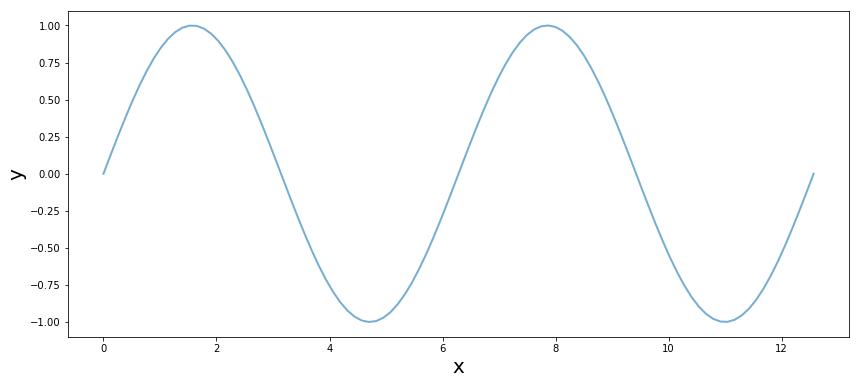

In [4]:
# A standard way to plot the data using matplotlib (create fig, axes --> plot on axes):
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(x, y, alpha=0.6, lw=2)
ax.set_ylabel("y", size=20)
ax.set_xlabel("x", size=20)

Bokeh may be used to make this plot more interactive, and the code is conceptually similar to what you might be used to with e.g., matplotlib, but there are some nuances.

## 1.3 Basic Plotting via Bokeh

First off, data is typically stored using a method called `ColumnDataSource` from Bokeh. We can use the same data that we started with, but Bokeh uses so-called *sources* (see https://bokeh.pydata.org/en/latest/docs/reference/models/sources.html) as a convenient way to store and interact with your data. (Data does not have to be stored in a `ColumnDataSource`, but some of the functionality that allows for interactivity will be made easier if you do use a `CollumnDataSource`.)

In [5]:
# ColumnDataSource is a fundamental (although technically non-essential) object 
# in Bokeh used to store data for interactive plots. Let's import it:
from bokeh.models import ColumnDataSource

With `ColumnDataSource`, we can create a *source* for our plots containing our data, and potentially other things like associated color values.

In [6]:
# Let's add our data via the "data" argument in ColumnDataSource: 
source = ColumnDataSource(data=dict(x = x, y = y))

This *source* containing our data may now be used for plotting. 

Bokeh has a number of plot routines accessed through the `figure` object. The docs describing plot routines and methods are located here: https://bokeh.pydata.org/en/latest/docs/reference/plotting.html.

In [7]:
# Let's import "figure" from Bokeh and create a new plot:
from bokeh.plotting import figure

# Creating the plot, setting the figure height, width, specifying interactive plot tools:
plot = figure(plot_height=300, plot_width=900,
              tools="box_zoom,crosshair,pan,reset,save,wheel_zoom",
              x_range=[min(x), max(x)])

Above, we've used Bokeh's `figure` method to create a new figure object called **plot**. In doing so, we added a few tools that users can use to interact with the plot: a box zoom, togglable crosshair, screen panning, reset plot to initial position, a button to save the figure, and mouse wheel zoom capability. More tools and info on them are available at https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html.

___

Now let's actually draw our data onto the figure via the `line` method. (There are a bunch of different methods that may be used to draw data to a figure, referred to as *glyphs*, and again listed here: https://bokeh.pydata.org/en/latest/docs/reference/plotting.html)

In [8]:
# Draw the plot; setting source equal to our source object, we can access whatever we've stored 
# via their dictionary keys. In this case, it'll be just our data: "x" and "y". 
plot.line('x', 'y', source = source, alpha=0.6, line_width=2)

# axes labels:
plot.xaxis.axis_label = "x"
plot.yaxis.axis_label = "y"

show(plot)

## 1.4 Basic Bokeh Plotting in Summary

Plotting in Bokeh will commonly involve storing data in a `ColumnDataSource`, and then plotting the data using the `figure` class and one of it's plotting methods (e.g., `line` or `scatter`). A bit more info on the basics is available here: 

+ https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#userguide-plotting.

and for more on styling your plots (e.g., axis labels, etc.) see:

+ https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html


```python
# Imports
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

#+++++++++++++++++++++ SETUP BOKEH STUFF +++++++++++++++++++++++++++++++++++++++
# Add our data as a dictionary via the "data" argument in ColumnDataSource: 
source = ColumnDataSource(data=dict(x = x, y = y))

# Create the plot, set the figure height, width, specify plot tools:
plot = figure(plot_height=300, plot_width=900,
              tools="box_zoom,crosshair,pan,reset,save,wheel_zoom",
              x_range=[min(xdata), max(xdata)])

# Draw the plot:
plot.line('x', 'y', source = source, alpha=0.6, line_width=2)

# axes labels:
plot.xaxis.axis_label = "x"
plot.yaxis.axis_label = "y"
```
___

These are some of the basics for displaying some data set on a plot. However, more interactivity can be added through *widgets*.

# 2. Adding Bokeh Widgets & Creating an App

*Widgets* are used to manipulate data, they include things like sliders, togglable buttons, dropdown menus, and more. (See https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/widgets.html.) 

There are ways to interact with plots via a Jupyter notebook, see e.g. the following links:

+ https://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html
+ https://github.com/bokeh/bokeh/blob/master/examples/howto/server_embed/notebook_embed.ipynb 

but let's try writing this up as our own Bokeh app that will display in a browser. So, from what we've done so far, the code we'll need is something like the following...

### Summary of the Code so Far:

```python
""" 
    What we've done:
        
        1) Created some data
        2) Plotted it

"""
import numpy as np
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

#+++++++++++++++++++++++++ GENERAL SETUP +++++++++++++++++++++++++++++++++++++++
# Create some data to describe the sin wave.
N = 100
x = np.linspace(0, 4*np.pi, N)

def sin_func(x, amp=1.0, phi=0.0, w =1.0):
    
    return amp*np.sin(w*x + phi)

# our y data:
y = sin_func(x)

#+++++++++++++++++++++ SETUP BOKEH STUFF +++++++++++++++++++++++++++++++++++++++
# Add our data as a dictionary via the "data" argument in ColumnDataSource: 
source = ColumnDataSource(data=dict(x = x, y = y))

# Create the plot, set the figure height, width, specify plot tools:
plot = figure(plot_height=400, plot_width=900,
              tools="box_zoom,crosshair,pan,reset,save,wheel_zoom",
              x_range=[min(x), max(x)])

# Draw the plot:
plot.line('x', 'y', source = source, alpha=0.6, line_width=2)

# axes labels:
plot.xaxis.axis_label = "x"
plot.yaxis.axis_label = "y"

```
___
To make this more interesting, let's add a slider to modify the sine wave's phase.

___

## 2.1 Setting up a Slider & Creating a Layout

We'll import the `Slider` method (widget):

```python
from bokeh.models import Slider
```
___
 Next up, let's define a new slider using the method (`Slider`) we imported for it. The definition looks something like this:
 
```python                                                      
# Here's an example Slider definition for sin wave phase:                       
phase = Slider(title="Phase", value=0, start=0, end=2*np.pi, step=0.1)
```

We want our data values to update whenever a user interacts with this slider, so we'll need a *event handler* function. Here's a typical one that I've called `update_data`:

```python
#+++++++++++++++++++++ BOKEH WIDGET CALLBACKS +++++++++++++++++++++++++++++++++++
# This function updates data values whenever the user interacts with a widget.
def update_data(attrname, old, new):
    
    # Get the current slider values
    phi = phase.value
    
    # re-assign data values:
    x = np.linspace(0, 4*np.pi, N)
    y = sin_func(x, phi=phi)

    # update source's data:
    source.data = dict(x=x, y=y)

```

With this function, we can update our `x` and `y `values according to changes in our sine wave phase slider. We'll add some code to check whenever the slider is changed, and to perform this call this event handler to update the data when a change is detected by our widget.

```python

#+++++++++++++++++++++ BOKEH WIDGET & PLOT UPDATES +++++++++++++++++++++++++++++++

# Here we loop over each widget of interest and "on change" we update.
widgets = [phase]
for widget in widgets:
    widget.on_change('value', update_data)

```

and we'll also add code that then displays our plot and widgets on the current document being displayed by a Bokeh server. We'll import some methods to help us display the slider alongside our plot in a row, and to display our plot in a browser (see https://bokeh.pydata.org/en/latest/docs/reference/layouts.html for more on layouts):

```python
from bokeh.layouts import row, widgetbox
from bokeh.io import curdoc
```

The `widgetbox` arranges our widgets neatly together and `row` aligns everything together in a row. The last import (`curdoc`) will be used to interface your script with a Bokeh document displayed in a browser. For more details on concepts behind Bokeh (documents, servers, etc.:

+ https://bokeh.pydata.org/en/latest/docs/user_guide/concepts.html#userguide-concepts.

and for more details on input/output methods (e.g., `curdoc()`) see:

+ https://bokeh.pydata.org/en/latest/docs/reference/io.html

Let's use `widgetbox` to arrange our widget(s) neatly, and `curdoc` and `row` to display everything in a browser document, aligned in a row:

```python
# Here we're adding a widget box containing our widgets to the inputs...
inputs = widgetbox(*widgets)

# ...and adding our widget box and plot all in one row with specified width 
curdoc().add_root(row(inputs, plot, width=1600))
curdoc().title = "A Sine Wave"
```

and that's it! We've created a slider, a function to update our data whenever it changes, and then specified to display the plot and widget(s) in a browser document.
___

### The Code in Summary:

```python

""" 
    What we've done:
        
        1) Created some data
        2) Plotted it
        3) Created a Slider widget to interact with the data
        4) Told the script to output the plot and widget to a browser

"""

import numpy as np
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import Slider
from bokeh.layouts import row, widgetbox
from bokeh.io import curdoc

#+++++++++++++++++++++++++ GENERAL SETUP +++++++++++++++++++++++++++++++++++++++
# Create some data to describe the sin wave.
N = 100
x = np.linspace(0, 4*np.pi, N)

def sin_func(x, amp=1.0, phi=0.0, w =1.0):
    
    return amp*np.sin(w*x + phi)

y = sin_func(x)

#+++++++++++++++++++++ SETUP BOKEH STUFF +++++++++++++++++++++++++++++++++++++++
# Add our data as a dictionary via the "data" argument in ColumnDataSource: 
source = ColumnDataSource(data=dict(x = x, y = y))

# Create the plot, set the figure height, width, specify plot tools:
plot = figure(plot_height=400, plot_width=900,
              tools="box_zoom,crosshair,pan,reset,save,wheel_zoom",
              x_range=[min(x), max(x)])

# Draw the plot:
plot.line('x', 'y', source = source, alpha=0.6, line_width=2)

# axes labels:
plot.xaxis.axis_label = "x"
plot.yaxis.axis_label = "y"
                                                                                  
# Define widget(s):                                                                                
phase = Slider(title="Phase", value=0, start=0, end=2*np.pi, step=0.1)

#+++++++++++++++++++++ BOKEH WIDGET CALLBACKS +++++++++++++++++++++++++++++++++++
# This function updates data values whenever the user interacts with a widget.
def update_data(attrname, old, new):
    
    # Get the current slider values
    phi = phase.value
    
    # re-assign data values:
    x = np.linspace(0, 4*np.pi, N)
    y = sin_func(x, phi = phi)

    # update source's data:
    source.data = dict(x = x, y = y)

#+++++++++++++++++++++ BOKEH WIDGET & PLOT UPDATES +++++++++++++++++++++++++++++++

# Here we loop over each widget of interest and "on change" we update.
widgets = [phase]
for widget in widgets:
    widget.on_change('value', update_data)

# Here we're adding a widget box containing our widgets to the inputs...
inputs = widgetbox(*widgets)

# ...and adding our widget box and plot all in one row with specified width 
curdoc().add_root(row(inputs, plot, width=1600))
curdoc().title = "A Sine Wave"


```
___
### 2.1.1 Executing the script (or app) on a Bokeh server
To run your script in a browser, execute the following:

```bash
    bokeh serve --show your_script.py
```

and a browser window should open showing the plot and slider side-by side in a row as we specified.
___

So this is a skeleton for a Bokeh app that could be modified to create a wide variety of different visualizations with creative use of widgets, etc. There are some neat examples (with source code) here: https://bokeh.pydata.org/en/latest/docs/gallery.html.